# <center>NETFLIX DATA ANALYSIS</center>
![Cover](https://wallpaperbat.com/img/438130-netflix-logo-wallpaper.png)


# <i>ABOUT<i/>

In this personal data analysis project, I am eager to explore the Netflix dataset, which captures the essence of a streaming platform that has transformed the entertainment industry. Netflix's influence is multifaceted, extending globally and disrupting traditional viewing habits. The platform's commitment to original content production, coupled with a data-driven approach to user recommendations and technological innovation, has set new industry standards. Beyond its role as a streaming service, Netflix has become a cultural influencer, shaping viewer habits and impacting popular culture with diverse and award-winning programming. The platform's investment in diversity and inclusion further cements its role in shaping a more representative entertainment landscape. As a cinephile, I anticipate unraveling the stories and trends hidden within this dataset, offering a unique perspective on Netflix's profound impact on how we consume and engage with content. The dataset encompasses a wide array of movies and TV shows, capturing essential details such as show ID, type, title, director, cast, country, date added, release year, rating, duration, listed genres, and a brief description. The objectives of the project include performing Exploratory Data Analysis (EDA) to unveil distribution patterns, analyzing user behavior and content characteristics, and visualizing trends using Matplotlib and Seaborn. Through this exploration, insights into the distribution of content, user preferences, and the impact of various factors on ratings and genres are sought. The application of Python tools like Pandas, Matplotlib, and Seaborn emphasizes practical skills in data analysis and visualization.

# <i>USED LIBRARIES/PACKAGES IN THIS PROJECT</i>

* __numpy__ (as np is one of the very famous packages for working with arrays in python)
* __pandas__ (is greatly used in analysis of data and making dataframe)
* __matplotlib__ (Lets make our Analyzation fun and interative with the visualization library matplotlib)
* __seaborn__ (Adding more colours into matplotlib visualization)

## Importing the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
netflix_df=pd.read_csv(r'C:\Users\sparr\Downloads\Netflix dataset\new_netflix_titles.csv')

## Data Preparation and Cleaning

>  <strong>In the initial stages of this data analysis project, a crucial aspect involved data cleaning and preparation to ensure the dataset's integrity and suitability for analysis. This process included handling missing values, addressing duplicates, and converting relevant columns to appropriate data types. By ensuring consistency and accuracy in the dataset, I laid the groundwork for effective Exploratory Data Analysis (EDA).</strong>

In [3]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [5]:
netflix_df.nunique()

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64


We observe a considerable number of distinct values in several columns, which is expected given the nature of the information they represent. For instance, 'show_id' serves as a unique identifier, contributing to its large number of unique values. Similarly, 'title,' 'director,' 'cast,' 'country,' 'date_added,' 'listed_in,' and 'description' exhibit a significant diversity of entries, reflecting the variety present in these descriptive attributes for each movie or show.

### Handling Null Values

In [6]:
netflix_df.isna().any()

show_id         False
type            False
title           False
director         True
cast             True
country          True
date_added       True
release_year    False
rating           True
duration        False
listed_in       False
description     False
dtype: bool

In [7]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [8]:
netflix_df.isnull().sum().sum()

3036

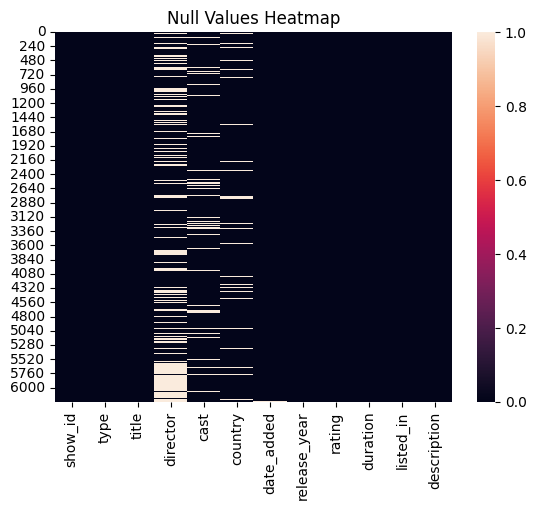

In [9]:
sns.heatmap(netflix_df.isnull(),cbar=True)
plt.title('Null Values Heatmap')
plt.show()

As evident from both the heatmap and table above, the dataset exhibits a notable presence of null values. Specifically, there are a total of 3,036 null values distributed across various columns. Among them, 'director' has 1,969 missing entries, 'cast' has 570, 'country' has 476, 'date_added' has 11, and 'rating' has 10. It is imperative to address these null data points comprehensively before proceeding with Exploratory Data Analysis (EDA) and subsequent modeling steps.

In [10]:
netflix_df.director.fillna('No Director',inplace=True)
netflix_df.cast.fillna('No Cast',inplace=True)
netflix_df.country.fillna('Country Unavailable',inplace=True)
netflix_df.dropna(subset=['date_added','rating'],inplace=True)

In [11]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6214 entries, 0 to 6222
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6214 non-null   int64 
 1   type          6214 non-null   object
 2   title         6214 non-null   object
 3   director      6214 non-null   object
 4   cast          6214 non-null   object
 5   country       6214 non-null   object
 6   date_added    6214 non-null   object
 7   release_year  6214 non-null   int64 
 8   rating        6214 non-null   object
 9   duration      6214 non-null   object
 10  listed_in     6214 non-null   object
 11  description   6214 non-null   object
dtypes: int64(2), object(10)
memory usage: 631.1+ KB


>  <strong>Addressing null values involves a nuanced approach. While the conventional method of deleting rows was considered, it poses a risk of information loss. Therefore, in this dataset, where columns like 'director,' 'cast,' and 'country' have a significant number of null values, I've chosen to label them as 'unavailable' for data context preservation. Additionally, the decision to drop 'date_added' and 'rating,' due to their minimal contribution, ensures minimal information loss. This approach strikes a balance between maintaining data integrity and effectively handling missing values, considering the dataset's specific characteristics.

In [12]:
netflix_movies=netflix_df[netflix_df.type=='Movie'].copy()
netflix_shows=netflix_df[netflix_df.type=='TV Show'].copy()

Given the dataset's inclusion of both movies and TV shows, creating separate datasets for each category allows for a focused exploration into Netflix movies and Netflix TV shows. This division will facilitate a more in-depth analysis of each category individually.

In [13]:
netflix_movies.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...


In [14]:
netflix_shows.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
5,80163890,TV Show,Apaches,No Director,"Alberto Ammann, Eloy Azorín, Verónica Echegui,...",Spain,"September 8, 2017",2016,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...",A young journalist is forced into a life of cr...
8,80117902,TV Show,Fire Chasers,No Director,No Cast,United States,"September 8, 2017",2017,TV-MA,1 Season,"Docuseries, Science & Nature TV","As California's 2016 fire season rages, brave ..."
26,80244601,TV Show,Castle of Stars,No Director,"Chaiyapol Pupart, Jintanutda Lummakanon, Worra...",Country Unavailable,"September 7, 2018",2015,TV-14,1 Season,"International TV Shows, Romantic TV Shows, TV ...",As four couples with different lifestyles go t...


### Data Preparation

In [15]:
netflix_movies['duration']=netflix_movies.duration.str.replace('min','').astype(int)

In [16]:
netflix_shows.rename(columns={'duration':'seasons'},inplace=True)
netflix_shows.replace({'seasons':{'1 Season':'1 Seasons'}},inplace=True)

In [17]:
netflix_shows.seasons=netflix_shows.seasons.str.replace('Seasons','').astype(int)

In [18]:
netflix_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4257 entries, 0 to 5580
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4257 non-null   int64 
 1   type          4257 non-null   object
 2   title         4257 non-null   object
 3   director      4257 non-null   object
 4   cast          4257 non-null   object
 5   country       4257 non-null   object
 6   date_added    4257 non-null   object
 7   release_year  4257 non-null   int64 
 8   rating        4257 non-null   object
 9   duration      4257 non-null   int32 
 10  listed_in     4257 non-null   object
 11  description   4257 non-null   object
dtypes: int32(1), int64(2), object(9)
memory usage: 415.7+ KB


In [19]:
netflix_shows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1957 entries, 2 to 6222
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1957 non-null   int64 
 1   type          1957 non-null   object
 2   title         1957 non-null   object
 3   director      1957 non-null   object
 4   cast          1957 non-null   object
 5   country       1957 non-null   object
 6   date_added    1957 non-null   object
 7   release_year  1957 non-null   int64 
 8   rating        1957 non-null   object
 9   seasons       1957 non-null   int32 
 10  listed_in     1957 non-null   object
 11  description   1957 non-null   object
dtypes: int32(1), int64(2), object(9)
memory usage: 191.1+ KB


Adjusting the Duration Data

To enhance the coherence of our data, adjustments have been made to the 'duration' column in the Netflix movies dataset. The 'min' suffix has been removed, and the values have been converted to integers for clarity. Additionally, in the Netflix shows dataset, the 'duration' column has been appropriately relabeled as 'seasons.' To ensure uniformity, the label '1 Season' has been replaced with '1 Seasons,' and the 'Seasons' suffix has been removed, followed by the conversion of values to integers. These modifications contribute to a more meaningful representation of the data.

## Exploratory Analysis and Visualization

In [20]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,No Director,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,No Director,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,No Director,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


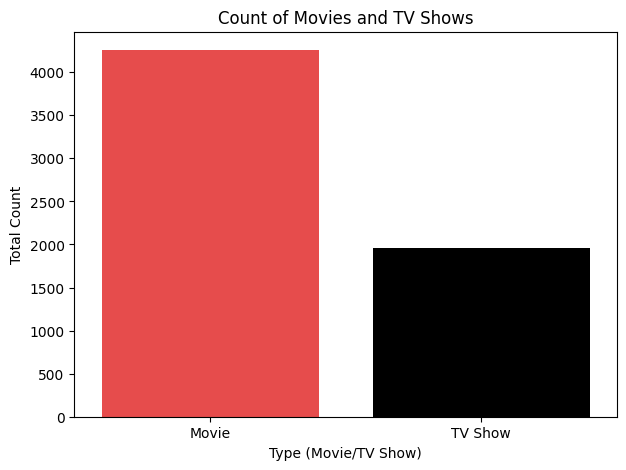

In [21]:
plt.figure(figsize=(7,5))
sns.countplot(x=netflix_df.type,palette=['#FF3333', 'black'])
plt.title('Count of Movies and TV Shows')
plt.xlabel('Type (Movie/TV Show)')
plt.ylabel('Total Count')
plt.show()

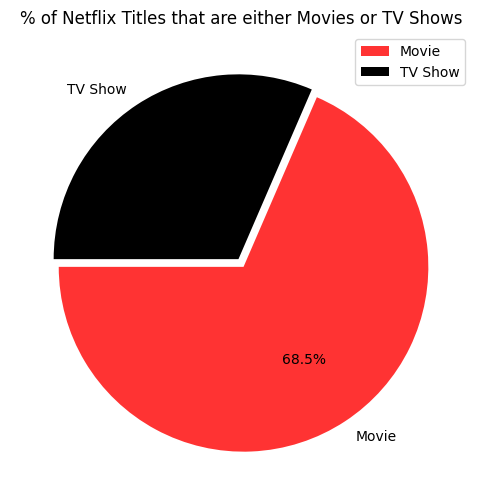

In [22]:
plt.figure(figsize=(12,6))
plt.title("% of Netflix Titles that are either Movies or TV Shows")
g = plt.pie(netflix_df.type.value_counts(), explode=(0.025,0.025), labels=netflix_df.type.value_counts().index, colors = ['#FF3333', 'black'],autopct='%1.1f%%', startangle=180);
plt.legend()
plt.show()

### Netflix Film Ratings

![Cover](https://e3.365dm.com/19/10/1600x900/skynews-netflix-age-ratings_4818809.jpg?20191028130253)

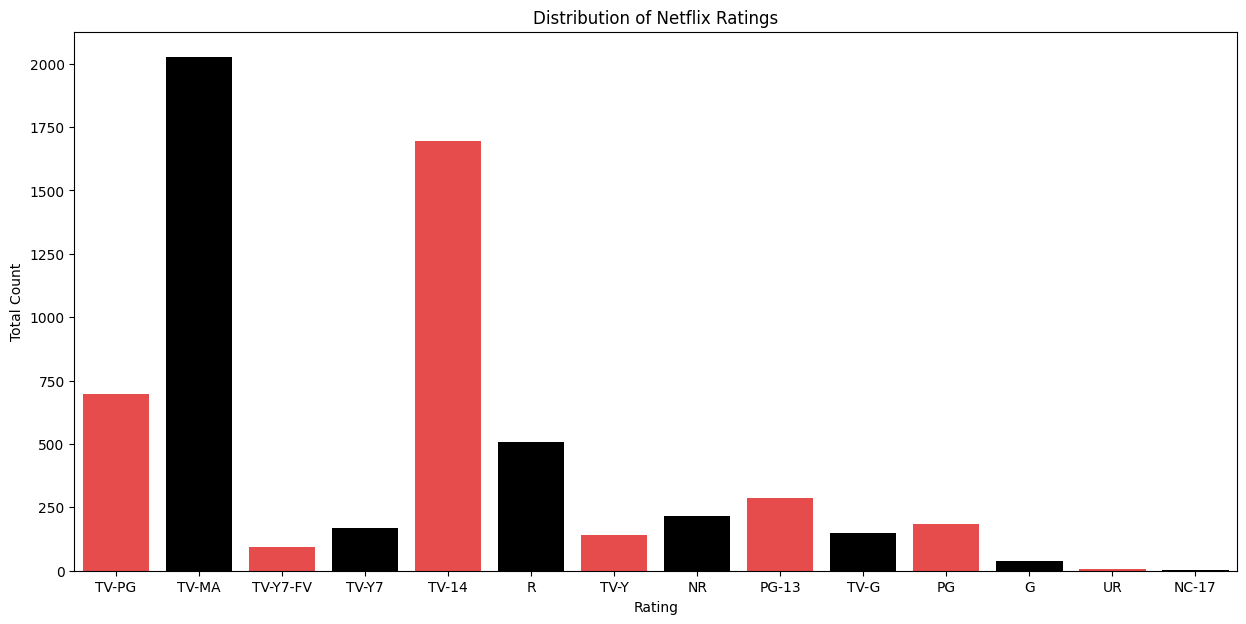

In [23]:
plt.figure(figsize=(15, 7))
sns.countplot(x=netflix_df.rating, palette=['#FF3333', 'black'])
plt.title('Distribution of Netflix Ratings')
plt.xlabel('Rating')
plt.ylabel('Total Count')
plt.show()

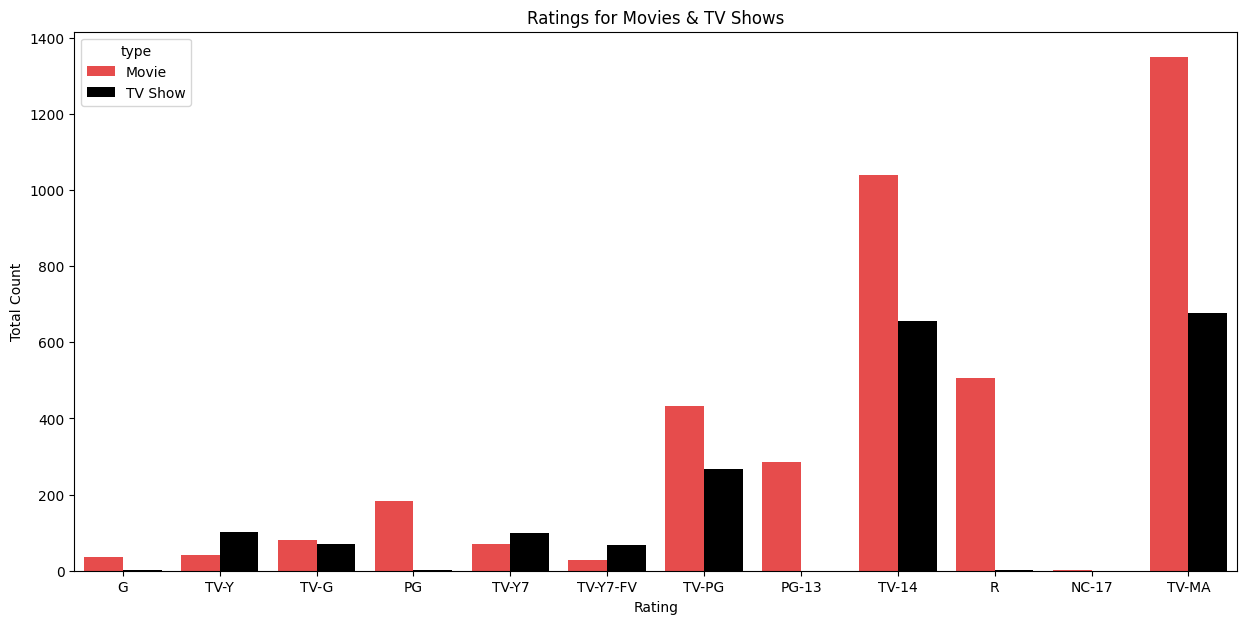

In [24]:
order =  ['G', 'TV-Y', 'TV-G', 'PG', 'TV-Y7', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(15,7))
g = sns.countplot(x=netflix_df.rating, hue=netflix_df.type, order=order, palette=['#FF3333', 'black']);
plt.title("Ratings for Movies & TV Shows")
plt.xlabel("Rating")
plt.ylabel("Total Count")
plt.show()

C:\Users\sparr\AppData\Local\Temp\ipykernel_31852\32221659.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


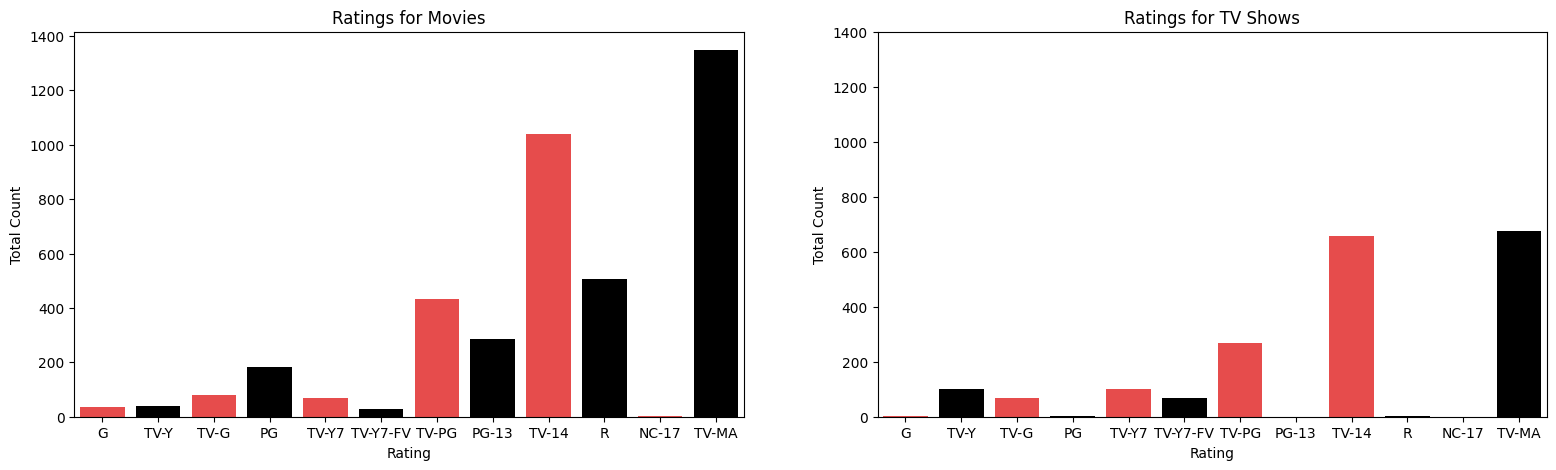

In [25]:
fig,ax=plt.subplots(1,2,figsize=(19,5))
sns.countplot(x=netflix_movies.rating,order=order,palette=['#FF3333', 'black'],ax=ax[0]);
ax[0].set_title('Ratings for Movies')
ax[0].set_xlabel('Rating')
ax[0].set_ylabel('Total Count')


g2=sns.countplot(x=netflix_shows.rating,order=order,palette=['#FF3333', 'black'],ax=ax[1]);
g2.set_title('Ratings for TV Shows')
g2.set(yticks=np.arange(0,1600,200))
g2.set_xlabel('Rating')
g2.set_ylabel('Total Count')
fig.show();


In general, the platform offers a greater variety of content tailored for a mature audience, with a notable emphasis on movies over TV shows. Conversely, for the younger audience, specifically those under the age of 17, the trend reverses, featuring a slightly higher number of TV shows compared to movies.

In [37]:
sns.set_palette(['#FF3333', 'black'])

I have set the default color palette for seaborn to align with the Netflix theme. The primary colors used throughout the analysis are `#FF3333` for movies and `black` for TV shows. This color combination reflects the aesthetic consistency with the Netflix brand.

In [26]:
netflix_df['year_added']=pd.DatetimeIndex(netflix_df.date_added).year
netflix_movies['year_added']=pd.DatetimeIndex(netflix_movies.date_added).year
netflix_shows['year_added']=pd.DatetimeIndex(netflix_shows.date_added).year
netflix_df['month_added']=pd.DatetimeIndex(netflix_df.date_added).month
netflix_movies['month_added']=pd.DatetimeIndex(netflix_movies.date_added).month
netflix_shows['month_added']=pd.DatetimeIndex(netflix_shows.date_added).month

### Year-wise content count

In [27]:
netflix_year=netflix_df.year_added.value_counts().to_frame().reset_index().rename(columns={'index':'year','year_added':'count'})
netflix_year = netflix_year[netflix_year.year != 2020]
netflix_year

,year,count
0,2019,2349
1,2018,1781
2,2017,1297
3,2016,453
5,2015,88
6,2014,25
7,2011,13
8,2013,12
9,2012,7
10,2009,2


In [28]:
netflix_year2 = netflix_df[['type','year_added']]
movie_year = netflix_year2[netflix_year2['type']=='Movie'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
movie_year = movie_year[movie_year.year != 2020]
show_year = netflix_year2[netflix_year2['type']=='TV Show'].year_added.value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
show_year = show_year[show_year.year != 2020]

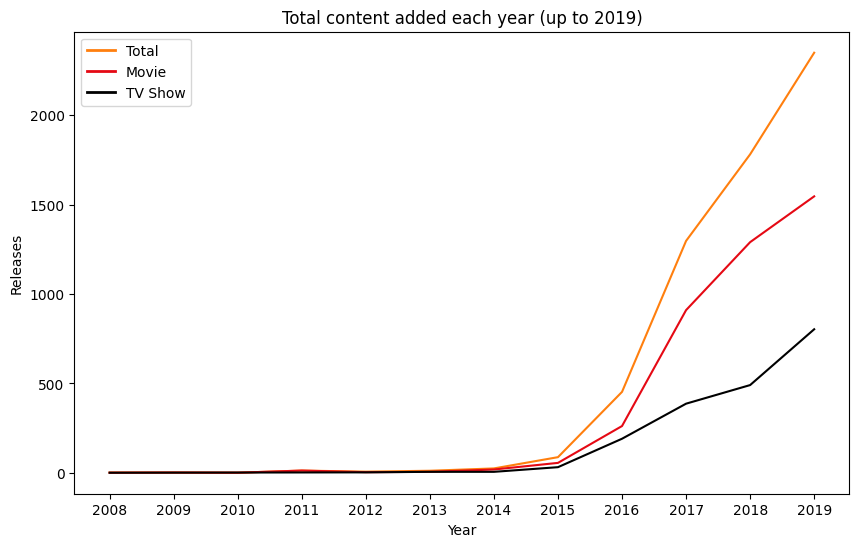

In [39]:
fig, ax = plt.subplots(figsize=(10, 6))
netflix_color = '#ff7f0e'
movie_color = '#E50914'
show_color = 'black'
sns.lineplot(data=netflix_year, x='year', y='count',color=netflix_color)
sns.lineplot(data=movie_year, x='year', y='count',color=movie_color)
sns.lineplot(data=show_year, x='year', y='count',color=show_color)
ax.set_xticks(np.arange(2008, 2020, 1))
plt.title("Total content added each year (up to 2019)")
legend_labels = ['Total', 'Movie', 'TV Show']
legend_handles = [plt.Line2D([0], [0], color=color, linewidth=2) for color in [netflix_color, movie_color, show_color]]
ax.legend(legend_handles,legend_labels, loc='upper left')
plt.ylabel("Releases")
plt.xlabel("Year")
plt.show()

Considering the timeline depicted above, it is evident that the prominent streaming platform began to garner attention post-2014. Subsequently, there has been a remarkable surge in the volume of added content. For a comprehensive analysis, I opted to exclude data from 2020 due to the incomplete representation of a full year. The trend highlights a sustained increase in the quantity of movies on Netflix as compared to TV shows.

![Cover](https://cdn.mos.cms.futurecdn.net/N6JgmjQCK9NYzwdXBrHSjh.jpg)

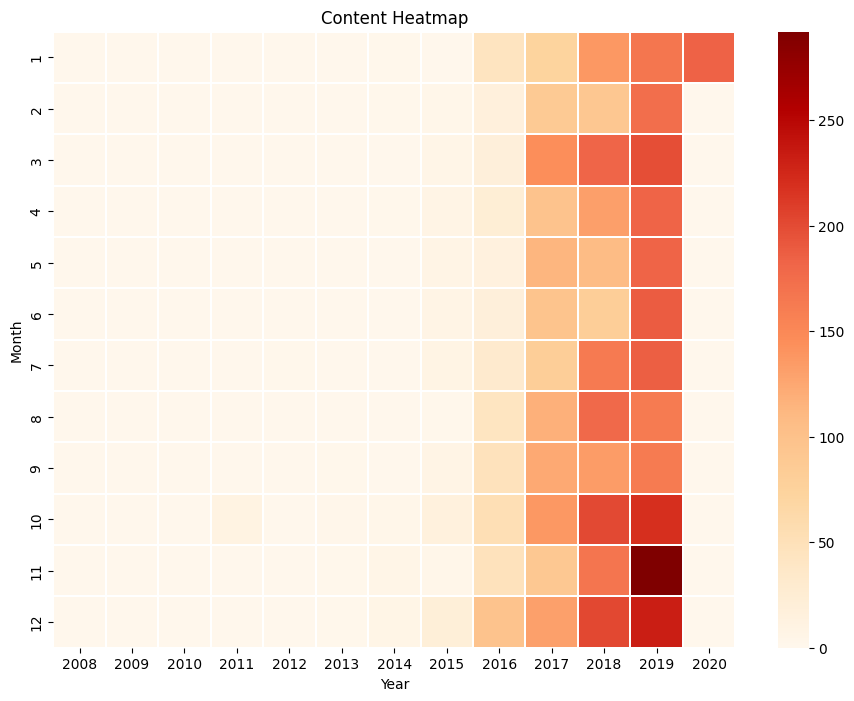

In [44]:
month_year_df = netflix_df.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

plt.figure(figsize=(11,8))
sns.heatmap(month_year_df, linewidths=0.025, cmap="OrRd")
plt.title("Content Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

In the heatmap above, it's evident that Netflix experienced a notable surge in content addition around 2014. The gradual upward trend persists over the subsequent years and months, indicating a continuous expansion of the platform's content library. Notably, the data for 2020 only extends up to January, reflecting the latest available month in the dataset.

### Netflix Content Duration

C:\Users\sparr\AppData\Local\Temp\ipykernel_31852\3941891541.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g1 = sns.distplot(x=netflix_movies.duration, color='skyblue',ax=ax[0]);
C:\Users\sparr\AppData\Local\Temp\ipykernel_31852\3941891541.py:11: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show();


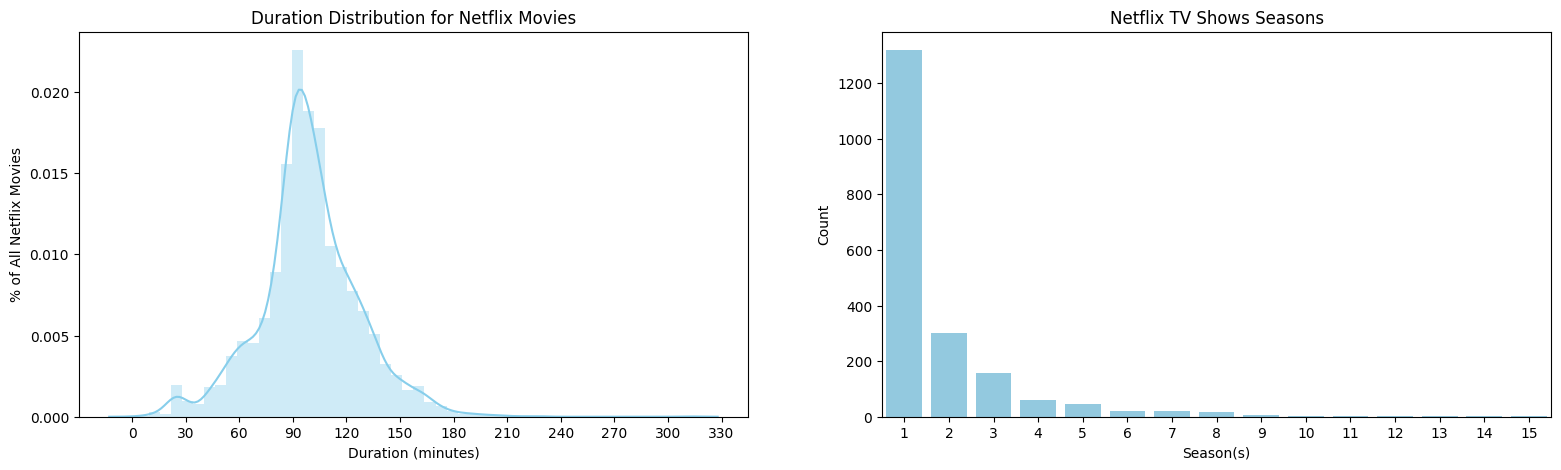

In [49]:
fig, ax = plt.subplots(1,2, figsize=(19, 5))
g1 = sns.distplot(x=netflix_movies.duration, color='skyblue',ax=ax[0]);
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")
g1.set_xlabel("Duration (minutes)")
g2 = sns.countplot(x=netflix_shows.seasons, color='skyblue',ax=ax[1]);
g2.set_title("Netflix TV Shows Seasons")
g2.set_ylabel("Count")
g2.set_xlabel("Season(s)")
fig.show();


Let's now explore the duration of Netflix content, distinguishing between movies and TV shows. As depicted on the left side, the duration distribution for Netflix movies exhibits a close resemblance to a normal distribution, with an average viewing time of approximately 90 minutes, aligning with typical movie lengths. Conversely, for Netflix TV shows, the distribution is noticeably skewed to the right, indicating that the majority of shows consist of only one season.

### Country-level analysis

![Cover](https://www.whats-on-netflix.com/wp-content/uploads/2022/01/most-popular-content-on-netflix-from-around-the-world.jpg)

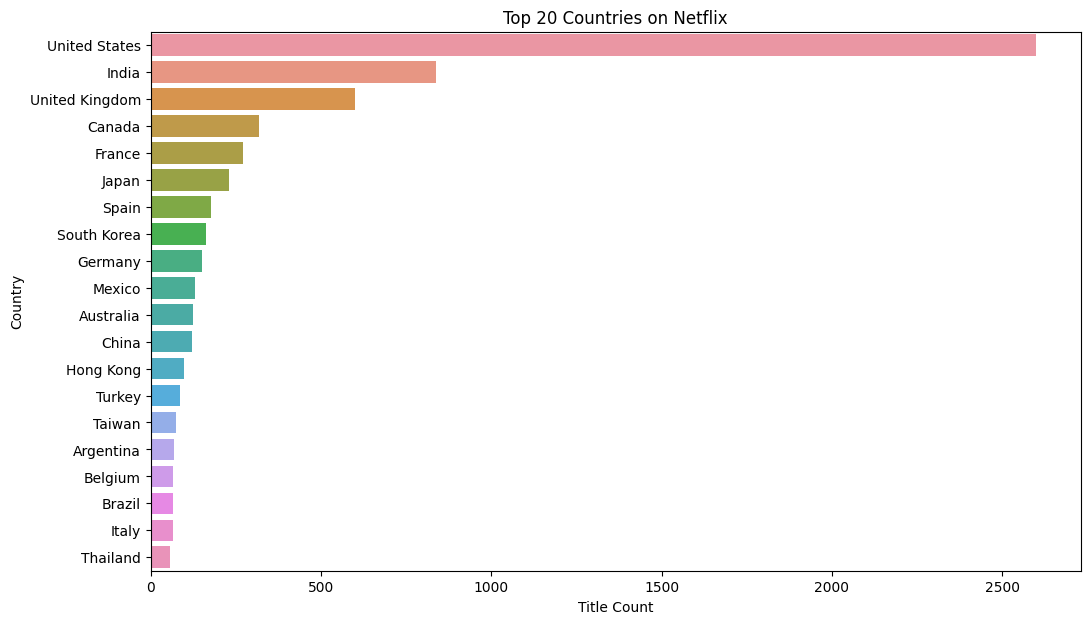

In [94]:
filtered_countries=netflix_df.set_index('title').country.str.split(', ',expand=True).stack().reset_index(level=1,drop=True)
filtered_countries=filtered_countries[filtered_countries!='Country Unavailable']

plt.figure(figsize=(12,7))
sns.countplot(y=filtered_countries,order=filtered_countries.value_counts().index[:20])
plt.title('Top 20 Countries on Netflix')
plt.xlabel('Title Count')
plt.ylabel('Country')
plt.show()

Next, let's delve into the countries contributing the most content to Netflix. Movies are typically available in multiple countries, as indicated in the original dataset. Therefore, we need to extract and analyze data for each individual country within a film. After isolating countries and eliminating titles with no specified country information, we can generate a Top 20 list to identify the countries with the highest abundance of films on Netflix. Predictably, the United States takes the lead, given that Netflix is an American company. Surprisingly, India secures the second spot, followed by the UK and Canada. Notably, China does not rank prominently, despite having approximately 18% of the world's population. Possible explanations for this could include political considerations and the restriction of certain applications, which is not uncommon between the United States and China.

### Popular Genres

![Cover](https://www.highspeedinternet.com/app/uploads/2018/06/Netflix_Header@4x.jpg)

I've introduced a versatile function named split_value_column to facilitate the handling of columns with multiple values. This function takes a dataframe, an index column, and a value column as parameters. It then splits the values in the specified column, creating a stacked series. This function is particularly useful for situations where a single column contains multiple entries, such as 'genres' or 'directors.' By employing this function, we can efficiently extract and analyze these values, contributing to a more streamlined approach in data exploration and visualization.

In [75]:
def split_value_column(dataframe,ind_column,val_column):
    stacked=dataframe.set_index(ind_column)[val_column].str.split(', ',expand=True).stack().reset_index(level=1,drop=True)
    return stacked
    

In [77]:
genres=split_value_column(netflix_df,'title','listed_in')
genres

title
Norm of the North: King Sized Adventure    Children & Family Movies
Norm of the North: King Sized Adventure                    Comedies
Jandino: Whatever it Takes                          Stand-Up Comedy
Transformers Prime                                         Kids' TV
Transformers: Robots in Disguise                           Kids' TV
                                                     ...           
Justin Time                                                Kids' TV
Terrace House: Boys & Girls in the City      International TV Shows
Terrace House: Boys & Girls in the City                  Reality TV
Weeds                                                   TV Comedies
Weeds                                                     TV Dramas
Length: 13638, dtype: object

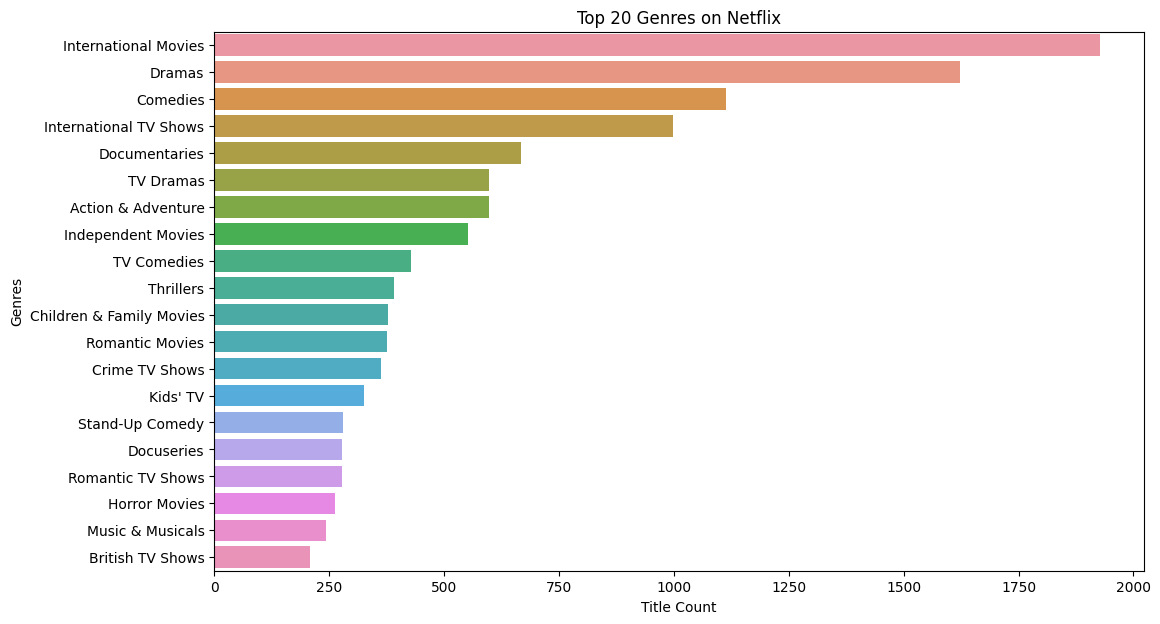

In [93]:
plt.figure(figsize=(12,7))
sns.countplot(y=genres,order=genres.value_counts().index[:20])
plt.title('Top 20 Genres on Netflix')
plt.xlabel('Title Count')
plt.ylabel('Genres')
plt.show()

In the realm of genres, international movies emerge as the unexpected frontrunner, closely pursued by dramas and comedies. Despite the United States boasting the largest content library, it appears that Netflix has strategically introduced a significant number of international movies. This strategic move might be attributed to the fact that a considerable portion of Netflix's subscriber base is international, emphasizing the platform's global reach beyond its domestic market.

### Top 10 directors on Netflix with the most releases

![Cover](https://2.bp.blogspot.com/-9_rmyU8u2Hg/UBwLvu-bkGI/AAAAAAAAFiQ/Gw9a5FEkg0A/s1600/Directors.jpg)

In [ ]:
https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.andsoitbeginsfilms.com%2F2012%2F08%2Fmy-top-10-favorite-directors-of-all-time.html&psig=AOvVaw2DXTAl5-U_hlStRLNRnpz1&ust=1707243351624000&source=images&cd=vfe&opi=89978449&ved=0CBMQjRxqFwoTCNiMnZ7nlIQDFQAAAAAdAAAAABAE

In [80]:
directors=split_value_column(netflix_df,'title','director')

In [81]:
directors=directors[directors!='No Director']

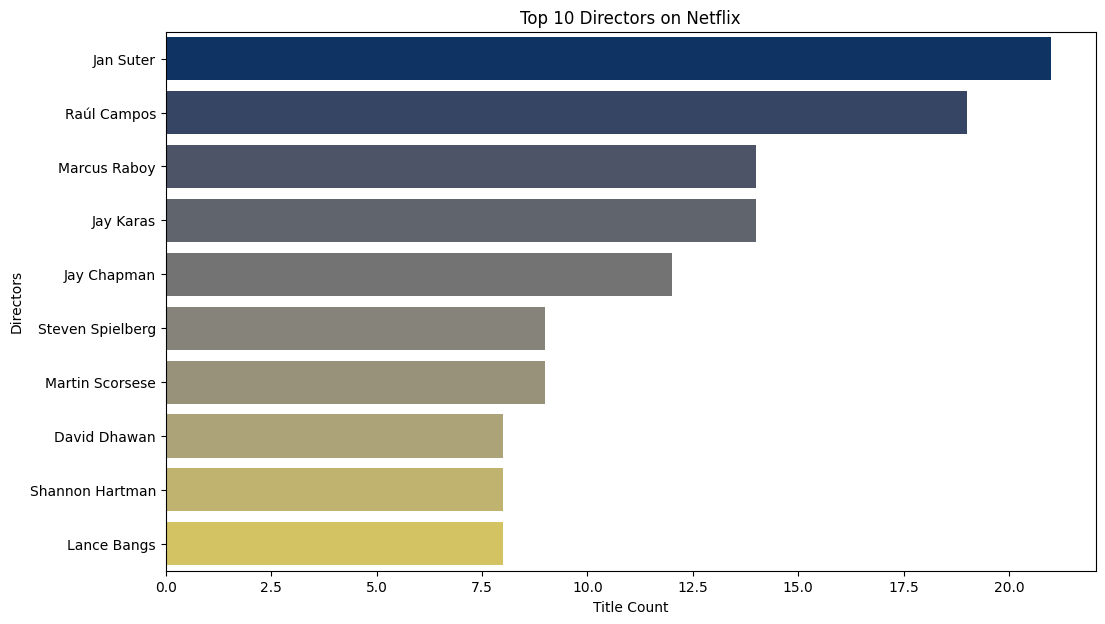

In [102]:
plt.figure(figsize=(12,7))
sns.countplot(y = directors, order=directors.value_counts().index[:10], palette='cividis')
plt.title('Top 10 Directors on Netflix')
plt.xlabel('Title Count')
plt.ylabel('Directors')
plt.show()

Directors with the highest number of titles on Netflix are predominantly international

### Top 10 actors on Netflix based on number of titles

![Cover](https://hips.hearstapps.com/hmg-prod/images/leo-movies-1622139513.jpeg?crop=0.888888888888889xw:1xh;center,top&resize=1200:*)

In [90]:
actors=split_value_column(netflix_df,'title','cast')

In [91]:
actors=actors[actors!='No Cast']

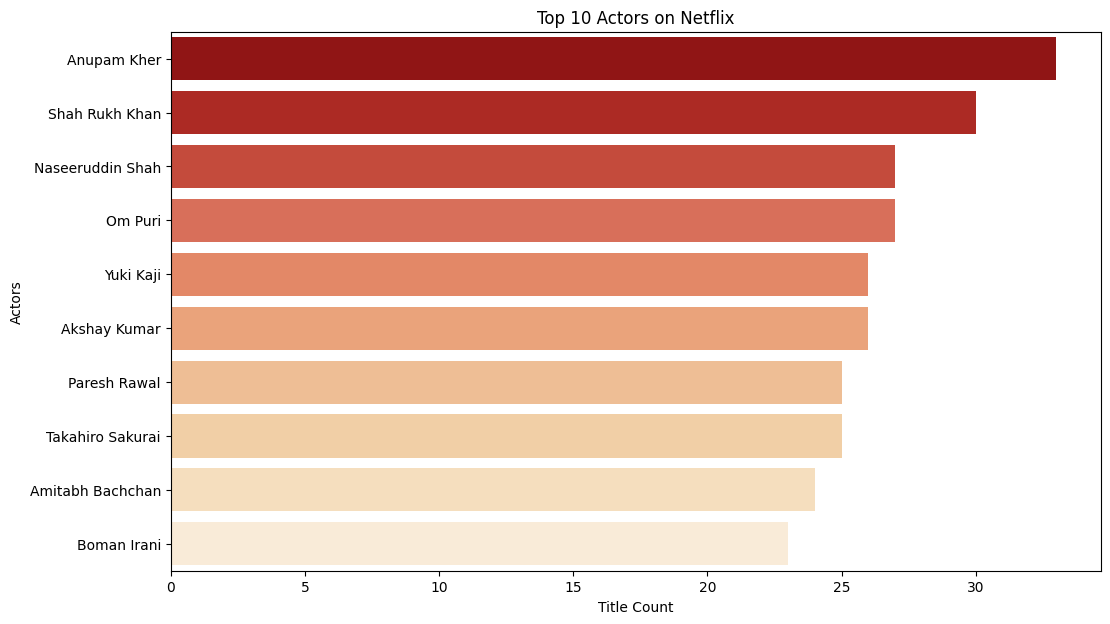

In [103]:
plt.figure(figsize=(12,7))
sns.countplot(y = actors, order=actors.value_counts().index[:10], palette='OrRd_r')
plt.title('Top 10 Actors on Netflix')
plt.xlabel('Title Count')
plt.ylabel('Actors')
plt.show()

### Timeline comparision of the addition of International Movies and International TV Shows

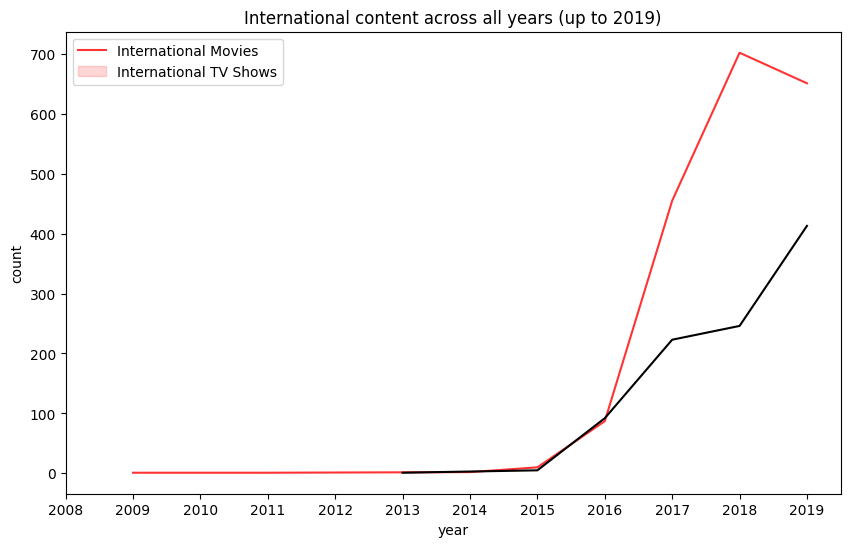

In [105]:
international_movies = netflix_df[netflix_df['listed_in'].str.contains('International Movies')]
intmov_year = international_movies['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
intmov_year = intmov_year[intmov_year.year != 2020]

international_shows = netflix_df[netflix_df['listed_in'].str.contains('International TV Shows')]
intshow_year = international_shows['year_added'].value_counts().to_frame().reset_index().rename(columns={'index': 'year','year_added':'count'})
intshow_year = intshow_year[intshow_year.year != 2020]

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=intmov_year, x='year', y='count')
sns.lineplot(data=intshow_year, x='year', y='count')
ax.set(xticks=np.arange(2008, 2020, 1))
plt.title("International content across all years (up to 2019)")
plt.legend(['International Movies','International TV Shows'])
plt.show()

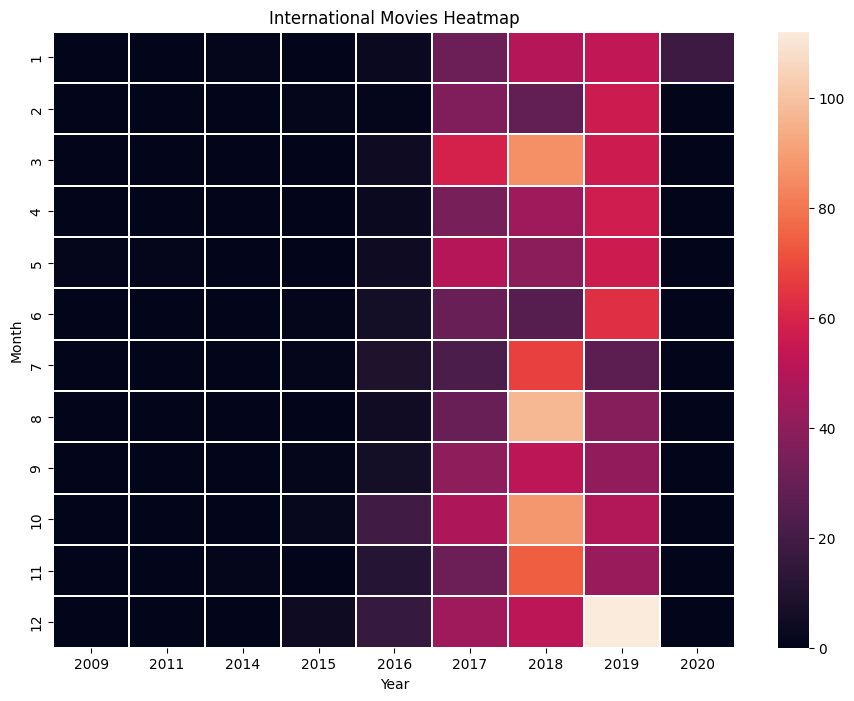

In [110]:
intmov_month_year_df = international_movies.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

fig, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(intmov_month_year_df, linewidths=0.025, cmap="rocket")
plt.title("International Movies Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

In the displayed heatmap, a significant surge in the addition of international movies is evident, predominantly occurring throughout 2018. Notably, December 2019 witnessed the highest influx of international movie content on Netflix.

To further explore the trend in international TV shows, a similar heatmap is generated for the year and month of addition. The resulting visualization provides insights into the distribution of international TV show additions over time.

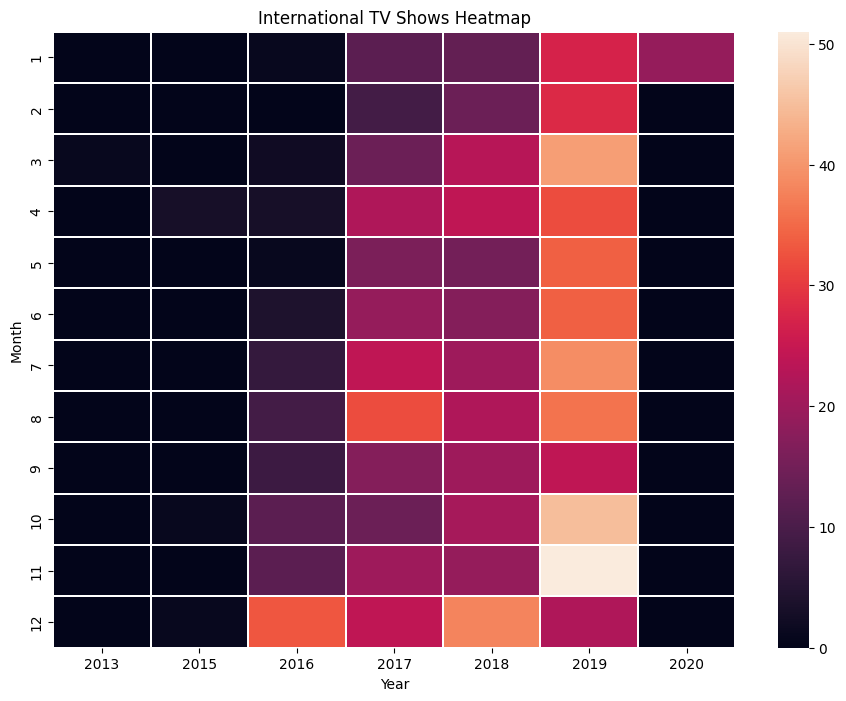

In [111]:
intshow_month_year_df = international_shows.groupby('year_added')['month_added'].value_counts().unstack().fillna(0).T

fig, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(intshow_month_year_df, linewidths=0.025, cmap="rocket")
plt.title("International TV Shows Heatmap")
plt.ylabel("Month")
plt.xlabel("Year")
plt.show()

Bulk of international TV shows were introduced predominantly during the course of the year 2019.

## Conclusion

The dataset provides a compelling narrative of Netflix's evolution, portraying the streaming giant's dynamic growth trajectory. Notably, Netflix strategically broadened its horizons beyond its initial U.S. stronghold, embracing international markets as a key driver of its success. The influx of international movies and TV shows, as reflected in the dataset, attests to Netflix's intentional global expansion efforts, shaping the platform into a worldwide entertainment phenomenon.

![Cover](https://static1.howtogeekimages.com/wordpress/wp-content/uploads/2020/09/Are-You-Still-Watching-Netflix.jpg)

## More to Explore

In future endeavors, delving into the integration of an advanced recommendation system stands out as a promising exploration. Leveraging machine learning algorithms and analyzing user behavior could enhance the Netflix experience by offering personalized content suggestions. This endeavor holds the potential to deepen insights from the dataset and refine the platform's capacity to cater to individual preferences, fostering heightened user engagement and satisfaction.